# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [6]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # ignorar warnings

# pa pintar
import pylab as plt  # libreria basica para pintar
#import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(12, 4)  # tamaño por defecto, decenas de pixeles

import seaborn as sns  # esta basada en matplotlib

# plotar inline en jupyter
%matplotlib inline 

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
fitbit=pd.read_csv("../data/Fitbit2.csv")

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [8]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


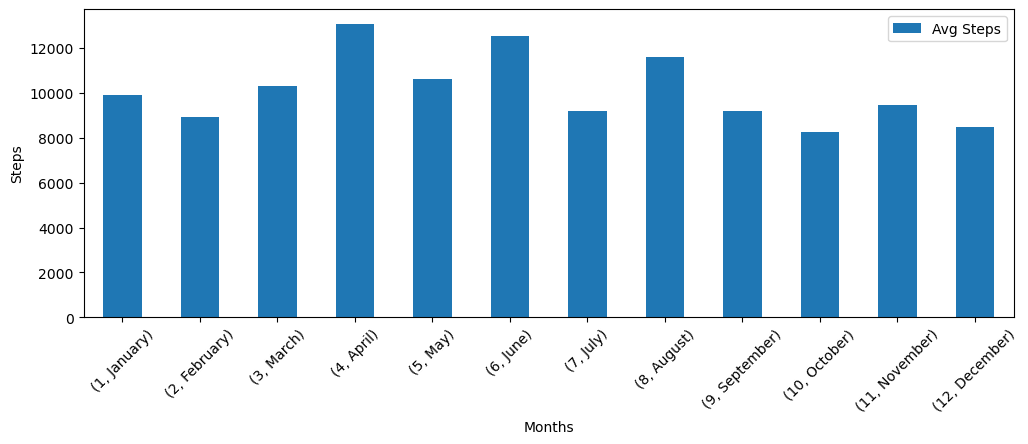

In [40]:
# AVERAGE STEPS BY MONTH_ENCODED

df=fitbit

df1=df.pivot_table(index=["Months_encoded", "Months"], values=["Steps"], aggfunc = "mean")

df1.plot.bar(rot=45,
            ylabel="Steps",
            xlabel="Months").legend(['Avg Steps']);


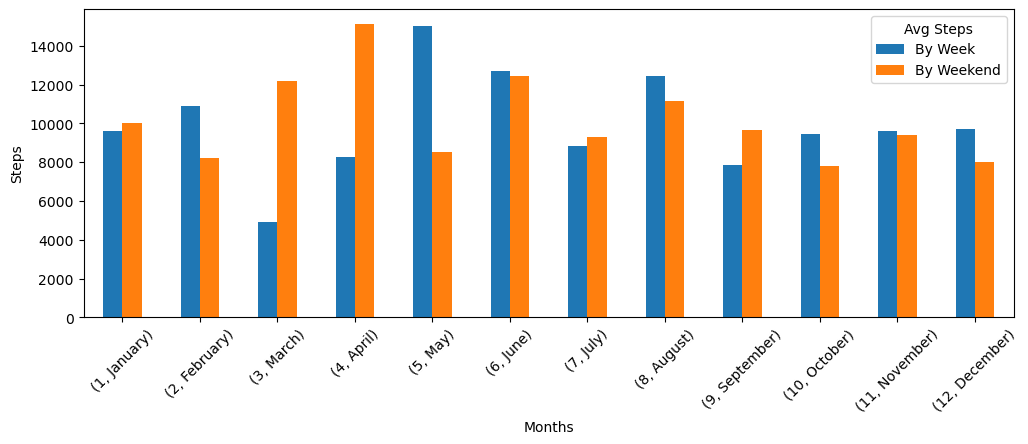

In [41]:
# AVERAGE STEPS BY WORK_OR_WEEKEND

df=fitbit

df1=df.pivot_table(index=["Months_encoded", "Months"],columns=["Work_or_Weekend"], values=["Steps"], aggfunc = "mean")

df1.plot.bar(rot=45,
             ylabel="Steps",
             xlabel="Months").legend(['By Week','By Weekend']).set_title("Avg Steps");

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

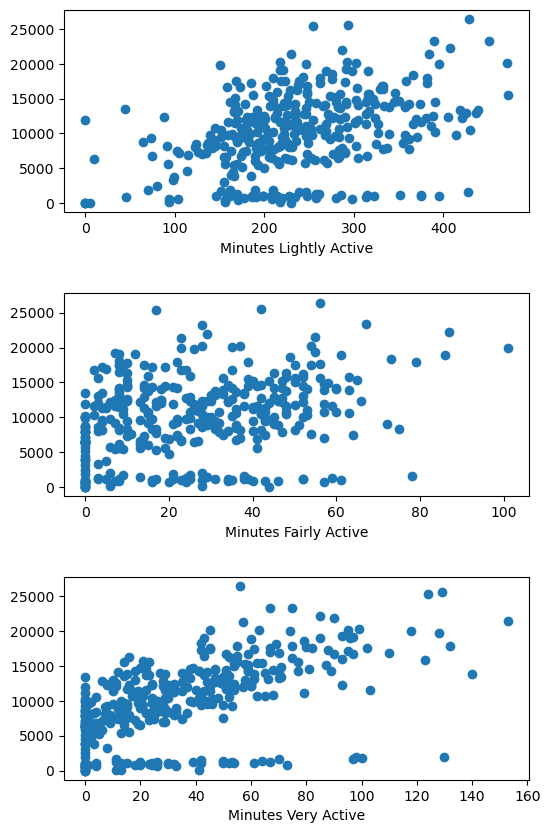

In [65]:
df=fitbit

fig, ax = plt.subplots(3, 1, figsize=(6, 10))     # figura de 1 fila y 3 columnas

count=0
for i in range(6,9):   

    ax[count].scatter(x=df[df.columns[i]], y=df["Steps"])
    ax[count].set_xlabel(df.columns[i]) 
    count+=1
    
plt.subplots_adjust(hspace=0.4);  # Adjust vertical spacing (increase the value as needed)
#plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [204]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Explore the titanic dataset using Pandas dtypes.

In [74]:
display(titanic.head())
titanic.dtypes

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [76]:
# NUMERICAL VARIABLES
df = titanic
df.select_dtypes(exclude='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [77]:
# CATEGORICAL VARIABLES
df = titanic
df.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [78]:
plt.rcParams['figure.figsize']=(12, 6)
sns.set(style='whitegrid')

#### Use the right visulalization to show the distribution of column `Age`.

In [87]:
titanic['Age']=titanic['Age'].astype(int)
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

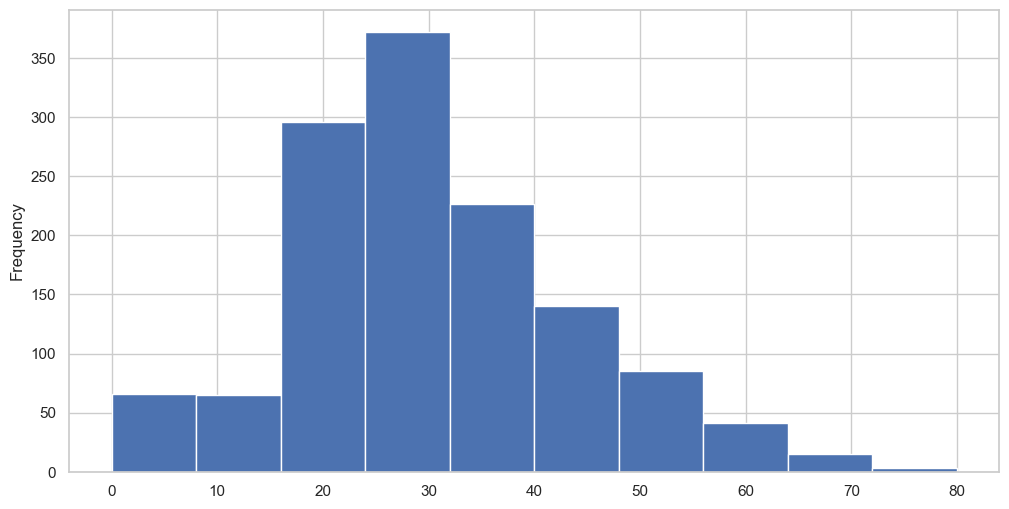

In [88]:
df=titanic
df["Age"].plot.hist();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

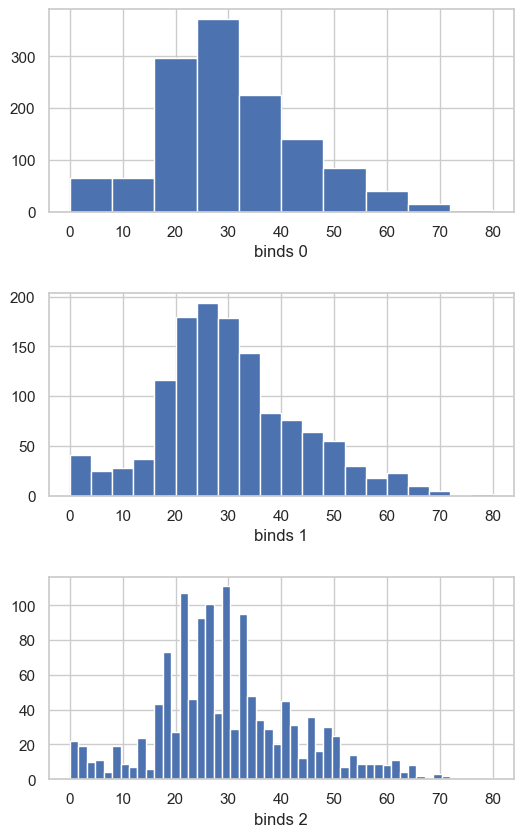

In [94]:
df=titanic

fig, ax = plt.subplots(3, 1, figsize=(6, 10))     # figura de 1 fila y 3 columnas

binds_list=[10,20,50]

count=0
for i in range(len(binds_list)):   
    ax[count].hist(df["Age"], bins=binds_list[i])
    ax[count].set_xlabel(f'binds {i}') 
    count+=1
    
plt.subplots_adjust(hspace=0.4);  # Adjust vertical spacing (increase the value as needed)
#plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
The number of bins affects to the depth of the analysis of the data distribution.
The use of large number of binds enables us to plot the frequency of a wider set of data levels.

"""

#### Use seaborn to show the distribution of column `Age`.

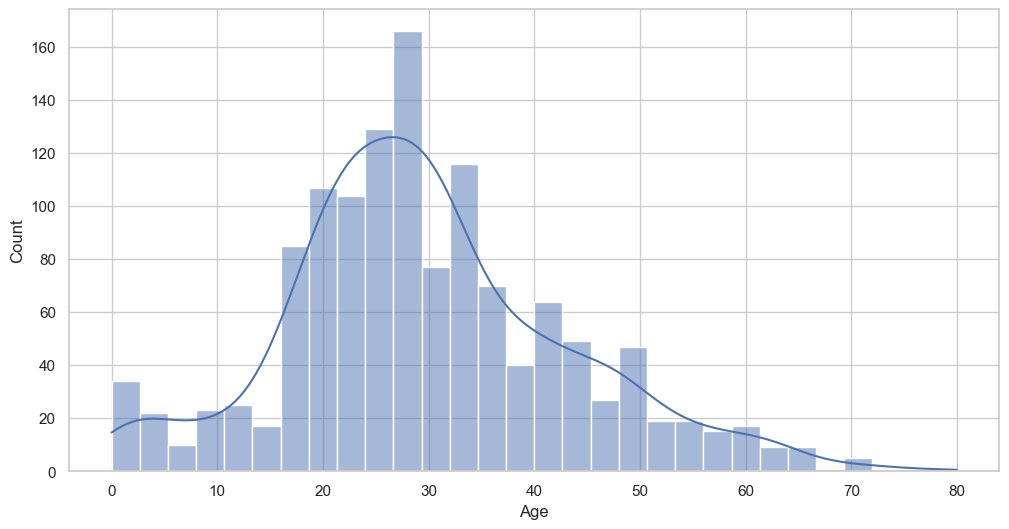

In [96]:
sns.histplot(df["Age"], kde=True);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [112]:
df.head()
genders=pd.DataFrame(df['Gender'].value_counts())
genders

,Gender
male,843
female,466


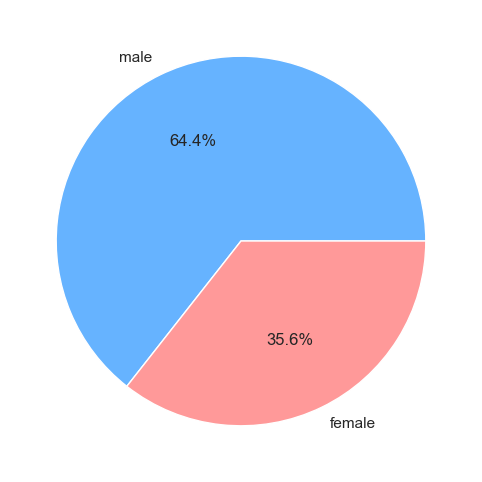

In [120]:
# Method 1 - matplotlib
colors = [ '#66b3ff', '#ff9999']
plt.pie(genders["Gender"], labels=genders.index, autopct='%1.1f%%',  colors=colors);


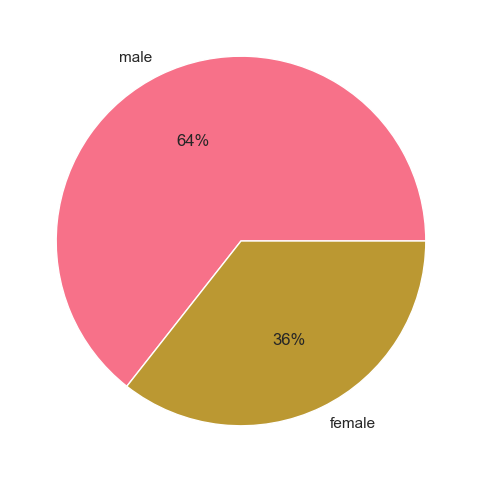

In [141]:
# Method 2 - seaborn

colors = sns.color_palette('husl')[0:2]

#create pie chart
plt.pie(genders["Gender"], labels = genders.index, colors = colors, autopct='%.0f%%');

#### Use the right plot to visualize the column `Pclass`.

In [151]:
df["Pclass"]=df["Pclass"].astype("category")

In [168]:
sumdf=pd.DataFrame(df["Pclass"].value_counts())
#sumdf=sumdf.T
sumdf

,Pclass
3,709
1,323
2,277


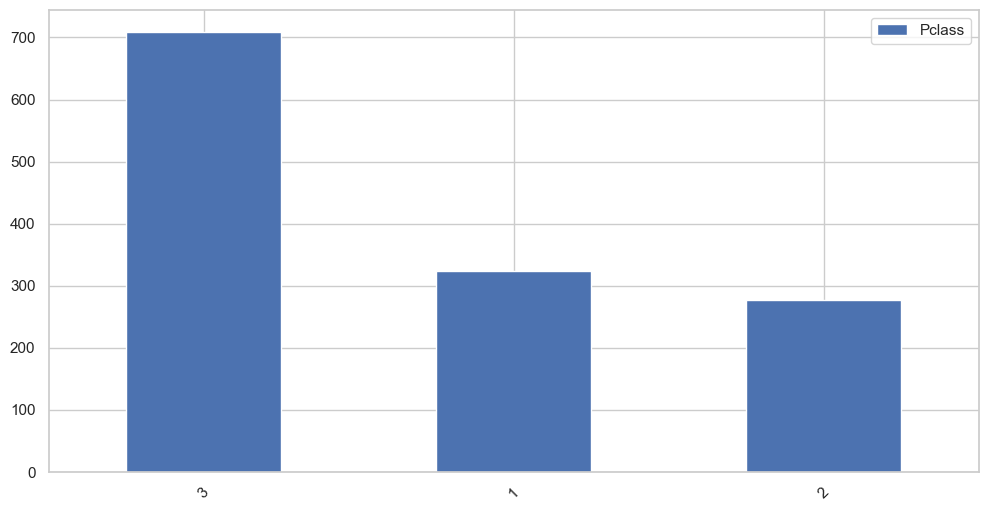

In [170]:
sumdf.plot.bar(rot=45);


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

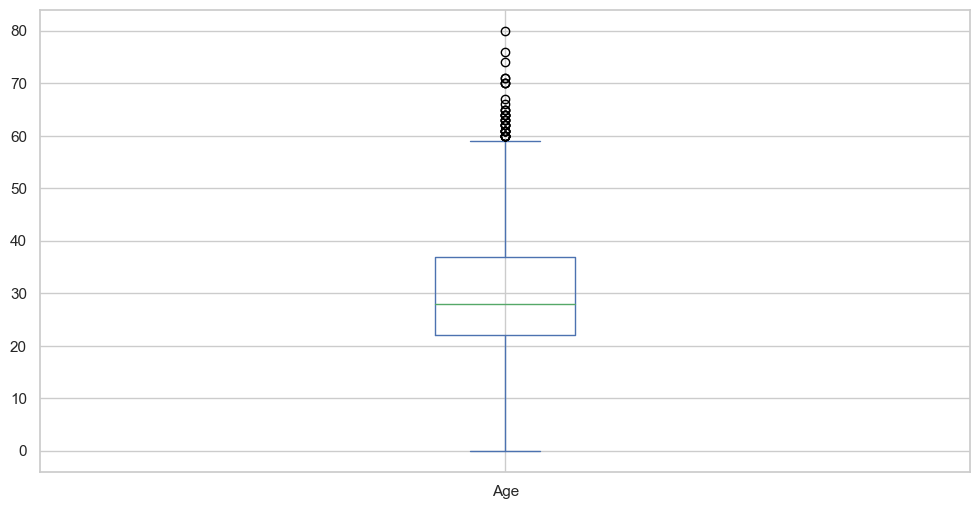

In [174]:


df["Age"].plot.box();

In [192]:
print('''
The boxplot represents, from bottom to top, the following stats:
''')

display(df["Age"].describe()[[3,4,5,6,7]])

print('''
And the dots represente the outliers.
''')



The boxplot represents, from bottom to top, the following stats:



min     0.0
25%    22.0
50%    28.0
75%    37.0
max    80.0
Name: Age, dtype: float64


And the dots represente the outliers.



#### What does the last plot tell you about the feature `Age`?

In [193]:
"""
I think that the age distribution seems quite normal
"""

'\nI think that the age distribution seems quite normal\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

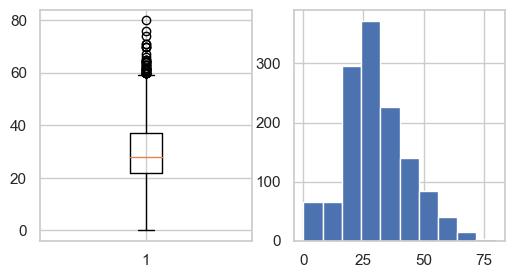

In [202]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))     # figura de 1 fila y 3 columnas
ax[0].boxplot(df["Age"])
ax[1].hist(df["Age"]);

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Gives deeper info about the age distribution
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [205]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,U0,S


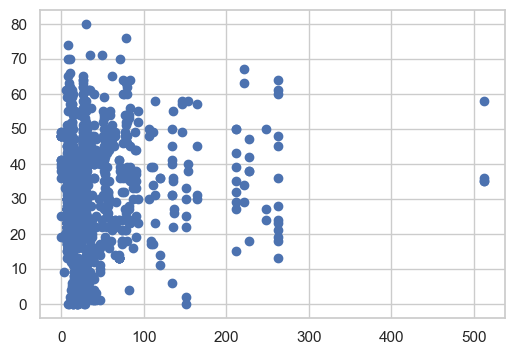

In [221]:
# Method 1 - matplotlib
plt.figure(figsize=(6, 4))
plt.scatter(df["Fare"], df["Age"]);



<AxesSubplot:xlabel='Fare', ylabel='Age'>

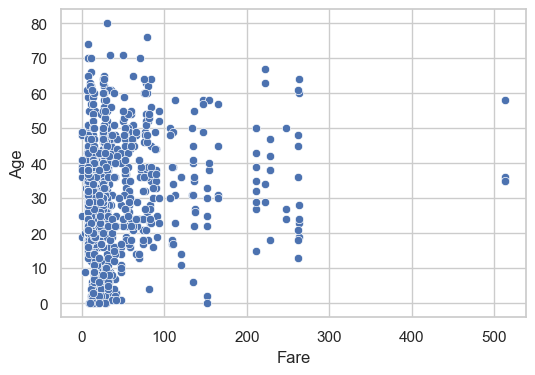

In [222]:
# Method 2 - seaborn

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Fare", y="Age")


#df.plot.scatter(x="Fare", y="Age", figsize=(6, 4));

#### Plot the correlation matrix using seaborn.

In [224]:
corrmat = df.corr()

corrmat

,PassengerId,Survived,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,0.025248,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.064080,-0.035322,0.081629,0.257307
Age,0.025248,-0.064080,1.000000,-0.260134,-0.143979,0.173464
SibSp,-0.055224,-0.035322,-0.260134,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,-0.143979,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,0.173464,0.160349,0.221635,1.000000


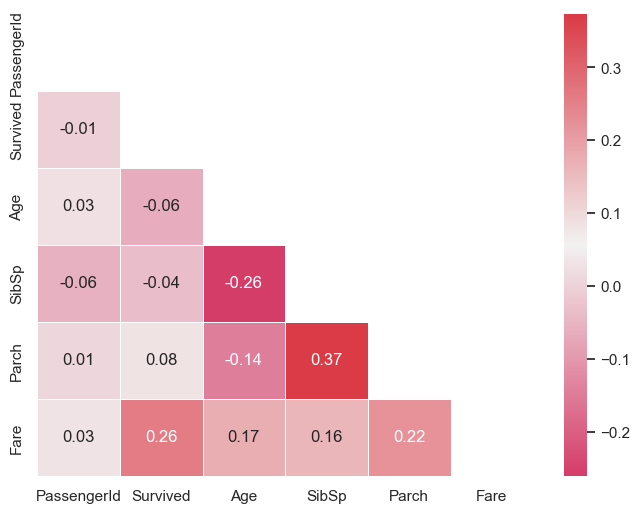

In [232]:
sns.set(style='white')       # estilo blanco

mascara = np.triu(np.ones_like(corrmat, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores



plt.figure(figsize=(8, 6))

red_white_red_palette = sns.diverging_palette(240, 10, sep=20, as_cmap=True)

sns.heatmap(corrmat, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, mask=mascara  )
plt.show()

#### What are the most correlated features?

In [ ]:
"""
SibSP shows the highest correlation with Parch
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

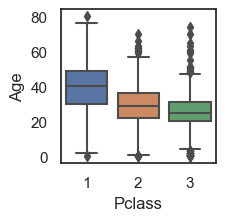

In [246]:
sns.set(style='white')

plt.figure(figsize=(2, 2))

sns.boxplot(x="Pclass", y="Age", data=df);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

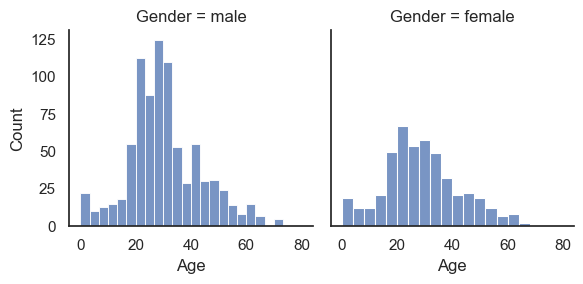

In [248]:
g = sns.FacetGrid(df, col="Gender")
g.map_dataframe(sns.histplot, x="Age")